<font size = 6>Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

#sys.path.append("C:\\Program Files\\Lumerical\\v202\\api\\python\\") #Default windows lumapi path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi

#sys.path.append(os.path.dirname('C:\\Users\\andre\\Documents\\GitHub\\Photonics\\Braggs Grating')) #Current directory
sys.path.append(os.path.dirname('/home/fotonica01/Documentos/GitHub/Photonics/Braggs Grating'))

from numpy.lib.scimath import sqrt as csqrt

<font size = 6>Reflectivity x Wavelength

AC variation = 0.0007903472237396756


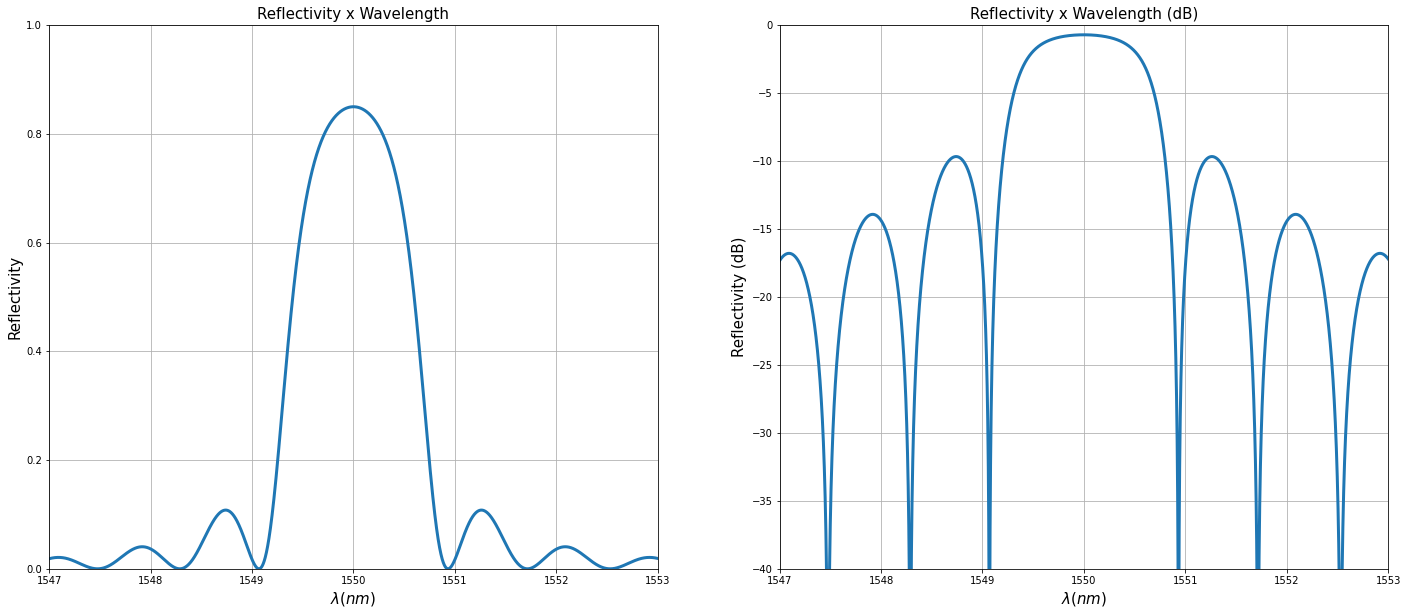

In [36]:
c0 = 299792458
neff = 1.447
lambdaD = 1550e-9
rmax = 0.85
L = 1e-3
pi = np.pi
lmbd = np.linspace(1547e-9, 1553e-9, 10000)
detuning = 2*pi*neff*(1/lmbd - 1/lambdaD)
sigma = 0
DCcoupling = sigma + detuning
kappa = np.arctanh(np.sqrt(rmax))/L
ACvariation = kappa*lambdaD/pi
print('AC variation = {}'.format(ACvariation))

r = (np.sinh(csqrt(kappa**2 - DCcoupling**2)*L)**2)/(np.cosh(csqrt(kappa**2 - DCcoupling**2)*L)**2 - (DCcoupling**2/kappa**2))
rdb = 10*np.log10(r)

fig1, ax0 = plt.subplots(1, 2, figsize = (24,10))

ax0[0].plot(lmbd*1e9, r, linewidth = 3)
ax0[0].set_title('Reflectivity x Wavelength', fontsize = 15)
ax0[0].set_xlabel(r'$\lambda (nm)$', fontsize = 15)
ax0[0].set_ylabel('Reflectivity', fontsize = 15)
ax0[0].set_xlim(1547, 1553)
ax0[0].set_ylim(0, 1)
ax0[0].grid(True)

ax0[1].plot(lmbd*1e9, rdb, linewidth = 3)
ax0[1].set_title('Reflectivity x Wavelength (dB)', fontsize = 15)
ax0[1].set_xlabel(r'$\lambda (nm)$', fontsize = 15)
ax0[1].set_ylabel('Reflectivity (dB)', fontsize = 15)
ax0[1].set_xlim(1547, 1553)
ax0[1].set_ylim(-40, 0)
ax0[1].grid(True)

<font size = 6>L variation

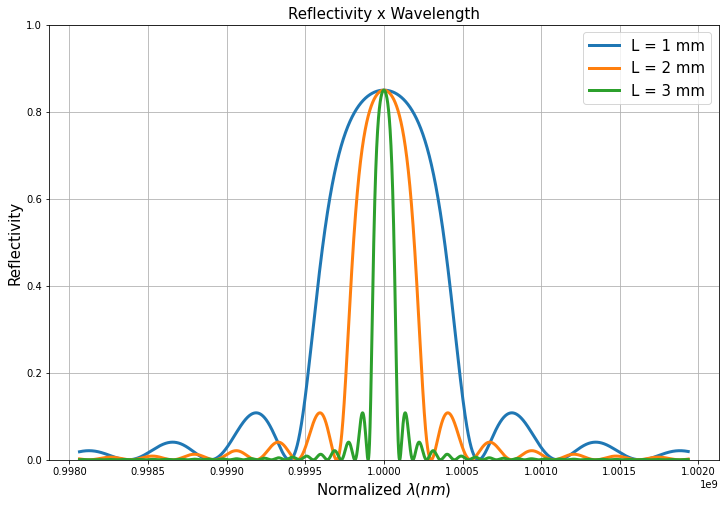

In [27]:
plt.figure(figsize = (12,8))

L = 1e-3

for i in range(3):
    L = L * (i+1)
    kappa = np.arctanh(np.sqrt(rmax))/L
    r = (np.sinh(csqrt(kappa**2 - DCcoupling**2)*L)**2)/(np.cosh(csqrt(kappa**2 - DCcoupling**2)*L)**2 - (DCcoupling**2/kappa**2))
    rdb = 10*np.log10(r)
    plt.plot(lmbd*1e9/lambdaD, r,label = 'L = {} mm'.format(i + 1), linewidth = 3)

plt.title('Reflectivity x Wavelength', fontsize = 15)
plt.xlabel(r'Normalized $\lambda (nm)$', fontsize = 15)
plt.ylabel('Reflectivity', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylim(0, 1)
plt.grid(True)

<font size = 6>Interconnect

In [5]:
inter = lumapi.INTERCONNECT(filename = 'Theoretical.icp')

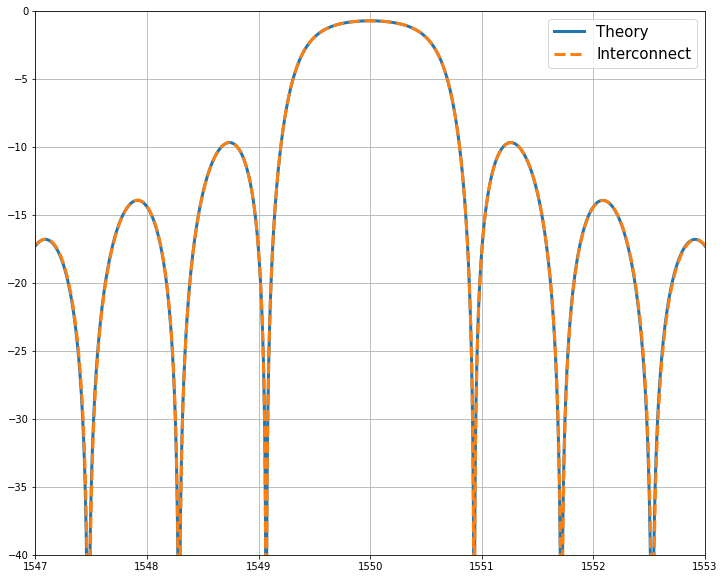

In [38]:
Iref = inter.getresult('ONA_1', 'input 1/mode 1/gain')

plt.figure(figsize = (12,10))
plt.plot(Iref['wavelength']*1e9, rdb, linewidth = 3, label = 'Theory')
plt.plot(Iref['wavelength']*1e9, Iref['TE gain (dB)'], linestyle = '--', linewidth = 3, label = 'Interconnect')
plt.legend(fontsize = 15)
plt.xlim(1547, 1553)
plt.ylim(-40, 0)
plt.grid(True)

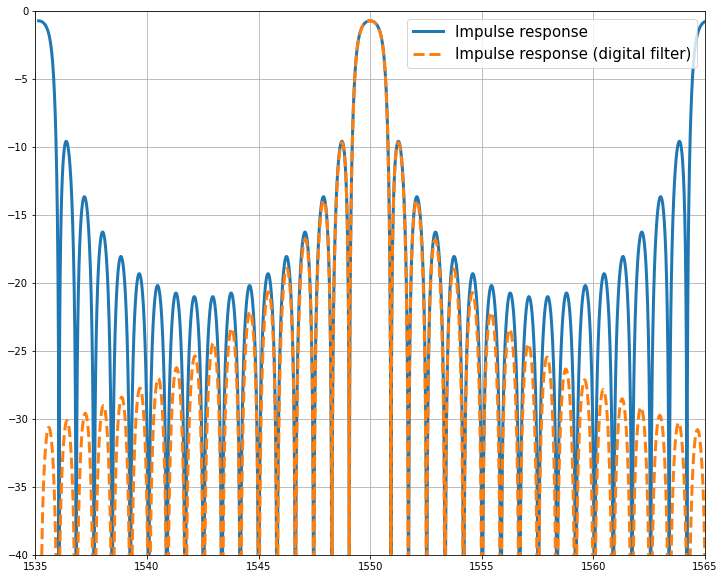

In [29]:
Impulse = inter.getresult('ONA_2', 'input 1/mode 1/gain')
Filtered = inter.getresult('ONA_3', 'input 1/mode 1/gain')

plt.figure(figsize = (12,10))
plt.plot(Impulse['wavelength']*1e9, Impulse['TE gain (dB)'], linewidth = 3, label = 'Impulse response')
plt.plot(Filtered['wavelength']*1e9, Filtered['TE gain (dB)'], linestyle = '--', linewidth = 3, label = 'Impulse response (digital filter)')
plt.legend(loc = 'upper right', fontsize = 15)
plt.xlim(1535, 1565)
plt.ylim(-40, 0)
plt.grid(True)